## 作业：Metropolis-Hastings Algorithm(M-H采样)

### 题目要求：通过标准正态分布得到混合高斯分布$0.7N(-1,2)+0.3N(1,1)$,采样10000个样本并用直方图表示

In [4]:
import random
import math
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step1 要采样的平稳分布的概略密度函数定义

In [5]:
#该函数返回取x=x_i的情况下平稳分布的概率密度函数的值p(x_i)
def stationaryDistributionProbabilty(x_i):  
    y = 0.7*norm.pdf(x_i, loc=-1,scale=2**0.5) + 0.3*norm.pdf(x_i,loc=1,scale=1)
    return y

### Step2 定义采样算法

#### 参数说明：
- iterNum：状态转移次数
- stationFunction：平稳分布函数

In [6]:
class M_H:
    def __init__(self,iterNum,stationaryFunction):
        self.iterNum = iterNum           
        self.f = stationaryFunction 
        
    #转移矩阵的条件转移概率，返回一个概略值 
    def conditionalProbability(self,sigma,mu):
        return norm.rvs(loc=mu, scale=sigma, size=1, random_state=None)
    
    #定义接受率，i,j分别代表状态i和状态j,有状态i转移到状态j
    def accpetRate(self,i,j):
        return min(1, (self.f(j) /self.f(i)))
    
    #运行算法，返回得到的样本
    def runAlgorithm(self,size):
        
        sampleX = np.zeros(self.iterNum+1)                        #用于存储采样得到的样本点 
        for num in range(self.iterNum):
            x_hat = self.conditionalProbability(1,sampleX[num])#获得新的样本点
            alpha = self.accpetRate(sampleX[num],x_hat)        #获取接受率
            u = random.uniform(0,1)                            #从均匀分布采样
            if u < alpha:
                sampleX[num+1] = x_hat
            else:
                sampleX[num+1] = sampleX[num]
        return sampleX[-size:]                             #返回最后size大小的样本点
    
    def print(self):
        print(self.iterNum)
        print(self.f(0))

### Step3 使用算法进行采样

In [7]:
iterNum = 100000   #定义迭代次数
size = 10000       #定义采集样本数量
algorithm =  M_H(iterNum,stationaryDistributionProbabilty)
targetSample = algorithm.runAlgorithm(size)

In [8]:
print(targetSample.size)

10000


### Step4 采样结果展示

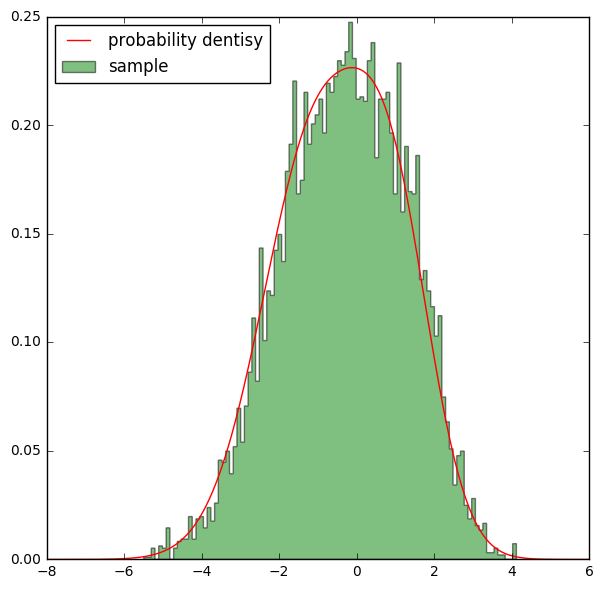

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (7,7))     #定义一个图，fig代表画布，ax是坐标轴,设置图像大小
#通过概略密度函数绘制概略密度曲线
x = np.linspace(-8,6,10000)
y = stationaryDistributionProbabilty(x)
ax.plot(x,y,color = "red",label = "probability dentisy")
#根据采集的样本点绘制直方图
#alpha:设置透明度
ax.hist(targetSample,color = "green", normed=True, alpha=0.5, histtype='stepfilled', label = "sample",bins = 100)
plt.legend(loc='upper left') # 调整标签位置到左上角
#plt.show()

* **上面图像中，红线是真实的概率函数曲线，绿色是采样结果的直方图，不难发现采样结果符合预期**
* 直方图中y轴的数值除以了样本总数，所以能够与概率密度曲线放在同一图中。